# Importing Libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve ,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from boruta import BorutaPy
from sklearn.model_selection import KFold
from scipy.stats import uniform
from sklearn.ensemble import StackingClassifier

# Reading the dataset

In [2]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\Dinesh M\OneDrive - Amrita Vishwa Vidyapeetham\ENGINEERING\SEM 4\MACHINE LEARNING\ML PROJECT\Liver Patient Dataset (LPD)_train.csv", encoding= 'unicode_escape')

# Dataset Overview

In [3]:
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
data.tail()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30690,30.0,Male,3.1,1.6,253.0,80.0,406.0,6.8,3.9,1.30,1


In [5]:
row_count, col_count = data.shape
print(f"Number of rows: {row_count}, Number of colums:{col_count} ")

Number of rows: 30691, Number of colums:11 


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   Alkphos Alkaline Phosphotase          29895 non-null  float64
 5   Sgpt Alamine Aminotransferase         30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ALB Albumin                           30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

# Statistics of the dataset

In [7]:
data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Data Preprocessing

## Renaming Features

In [8]:
data =  data.rename(columns={'Age of the patient':'Age', 'Gender of the patient':'Gender', 'Alkphos Alkaline Phosphotase':'ALP', 'Sgpt Alamine Aminotransferase':'ALT', 'Sgot Aspartate Aminotransferase':'AST', 'ALB Albumin':'Albumin', 'A/G Ratio Albumin and Globulin Ratio':'A/G Ratio'})

In [9]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,ALP,ALT,AST,Total Protiens,Albumin,A/G Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


## Removing duplicate rows

In [10]:
data.shape

(30691, 11)

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(19368, 11)

## Handling missing values in Gender column

In [13]:
data['Gender'].isnull().sum()

796

In [14]:
data['Gender'] = data['Gender'].ffill()

In [15]:
data['Gender'].isnull().sum()

0

## Encoding Categorical data into Numerical data

In [16]:
LabelEncoder = LabelEncoder()
data['Gender'] = LabelEncoder.fit_transform(data['Gender'])

# 0 - Female, 1 - Male

In [17]:
data['Gender']

0        0
1        1
2        1
3        1
4        1
        ..
29974    1
29976    1
30686    1
30688    1
30689    0
Name: Gender, Length: 19368, dtype: int32

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19368 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               19367 non-null  float64
 1   Gender            19368 non-null  int32  
 2   Total Bilirubin   18811 non-null  float64
 3   Direct Bilirubin  18878 non-null  float64
 4   ALP               18674 non-null  float64
 5   ALT               18909 non-null  float64
 6   AST               18975 non-null  float64
 7   Total Protiens    18998 non-null  float64
 8   Albumin           18955 non-null  float64
 9   A/G Ratio         18932 non-null  float64
 10  Result            19368 non-null  int64  
dtypes: float64(9), int32(1), int64(1)
memory usage: 1.7 MB


## Finding missing values

In [19]:
#finding the missing values
data.isnull().sum()

Age                   1
Gender                0
Total Bilirubin     557
Direct Bilirubin    490
ALP                 694
ALT                 459
AST                 393
Total Protiens      370
Albumin             413
A/G Ratio           436
Result                0
dtype: int64

## Filling missing values with mean

In [20]:
data.fillna(data.mean(), inplace = True)

In [21]:
#verifying whether the missing values are handled or not
data.isnull().sum()

Age                 0
Gender              0
Total Bilirubin     0
Direct Bilirubin    0
ALP                 0
ALT                 0
AST                 0
Total Protiens      0
Albumin             0
A/G Ratio           0
Result              0
dtype: int64

## Boxplot before handling outliers

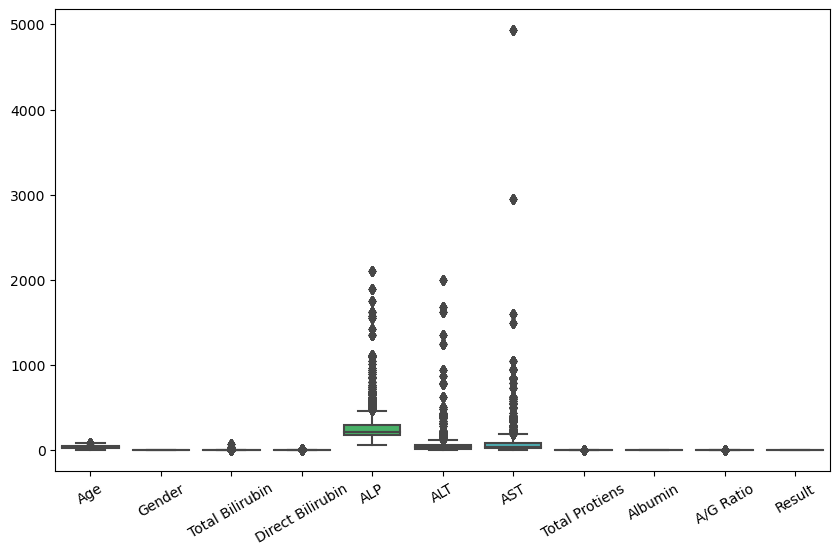

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data)
plt.xticks(rotation=30)
plt.show()

## Handling outliers

In [23]:
for column in data.columns:
    # Calculate quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bench values
    min_bench = Q1 - 1.5 * IQR
    max_bench = Q3 + 1.5 * IQR
    
    # Replace outliers
    data[column] = np.where(data[column] < min_bench, Q1, data[column])
    data[column] = np.where(data[column] > max_bench, Q3, data[column])

## Boxplot after handling outliers

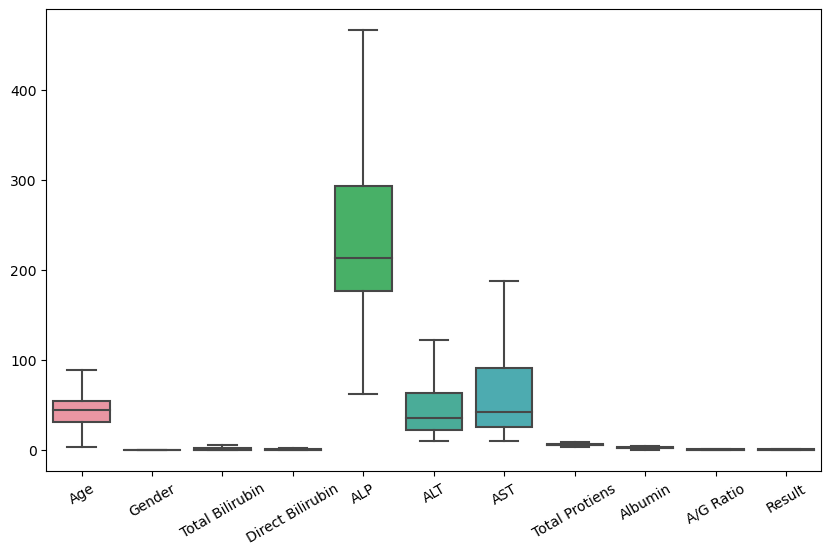

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = data)
plt.xticks(rotation=30)
plt.show()

In [25]:
data.shape

(19368, 11)

# Data Visualization

## Scatter Plot

E:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


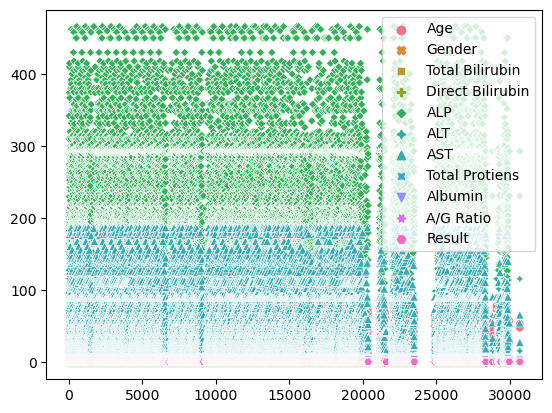

In [26]:
sns.scatterplot(data)
plt.show()

## Histogram

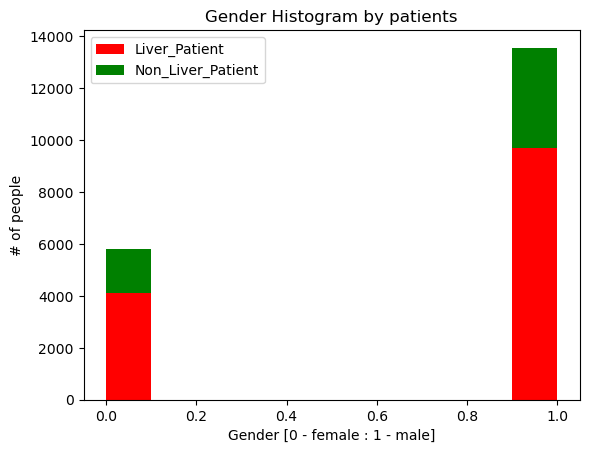

In [27]:
#HISTOGRAM TO THE PERSONS WHO ARE UNHEALTHY PERSONS BASED ON GENDER
plt.hist(x=[data[data['Result'] == 1]['Gender'], data[data['Result'] == 2]['Gender']], 
         stacked=True, color=['r','g'], label=['Liver_Patient', 'Non_Liver_Patient'])
plt.title('Gender Histogram by patients')
plt.xlabel('Gender [0 - female : 1 - male]')
plt.ylabel('# of people')
plt.legend()
plt.show()

## Pie Chart

Total Unhealthy Livers (1.0) :  13811 and its percentage is 71.31 %
Total Healthy Livers (2.0) :  5557 and its percentage is 28.69 %


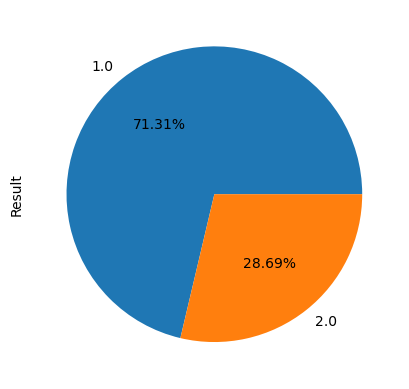

In [28]:
# Validate each class to understand if the dataset is imbalanced.
print ('Total Unhealthy Livers (1.0) :  {} and its percentage is {} %'.format(data.Result.value_counts()[1], round(data.Result.value_counts()[1]/data.Result.value_counts().sum()*100,2)) )
print ('Total Healthy Livers (2.0) :  {} and its percentage is {} %'.format(data.Result.value_counts()[2], round(data.Result.value_counts()[2]/data.Result.value_counts().sum()*100,2)) )
data["Result"].value_counts().plot(kind="pie", autopct="%.2f%%")
plt.show()

## Histogram

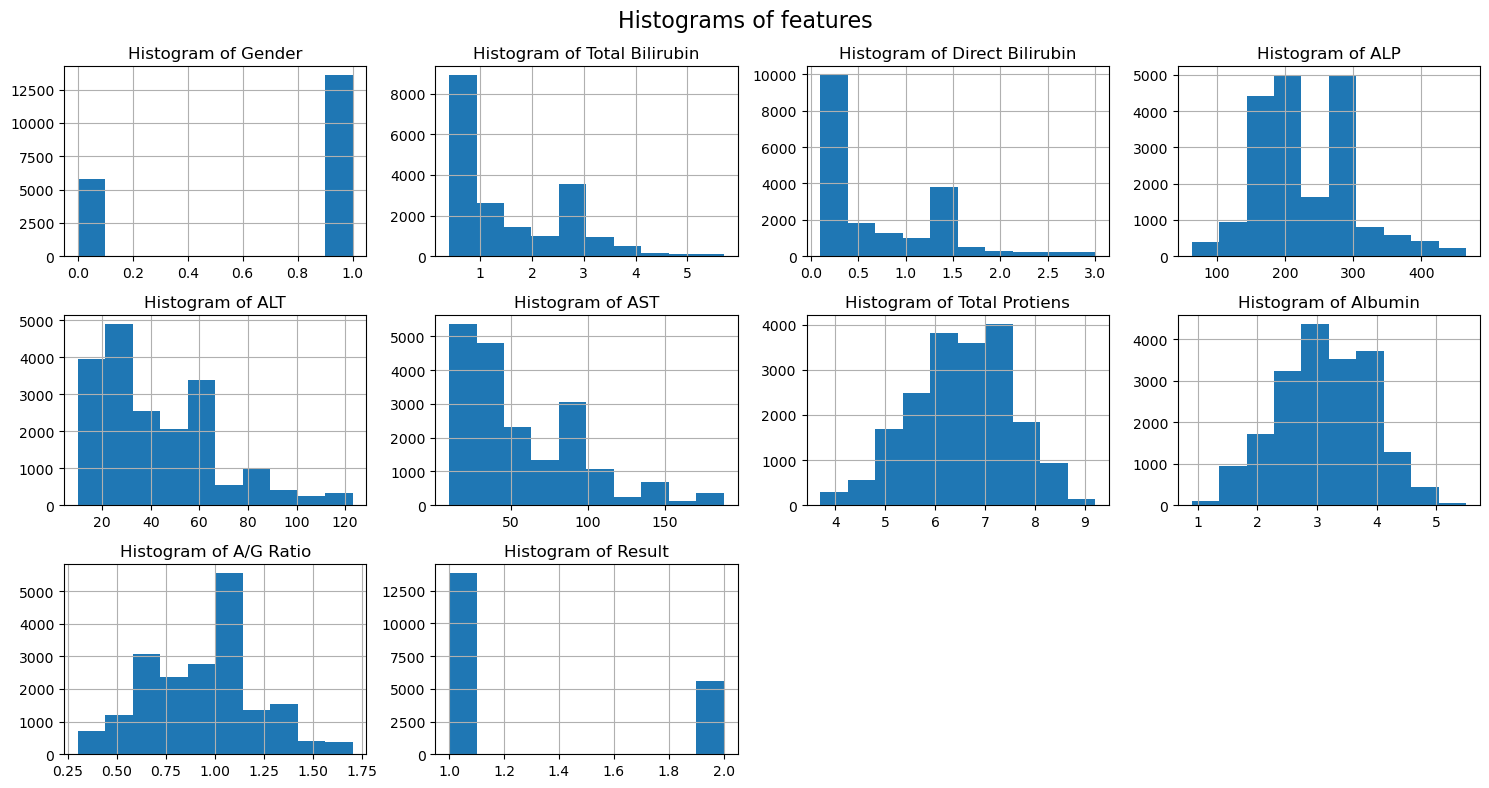

In [29]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(data.columns[1:12]):  # Exclude the first column (assuming it's an ID or irrelevant)
    plt.subplot(3, 4, i+1)  # Adjust subplot layout as per your preference
    data[feature].hist()
    plt.title("Histogram of {}".format(feature))
plt.suptitle('Histograms of features', fontsize=16)
plt.tight_layout()
plt.show()

## Violin Plot

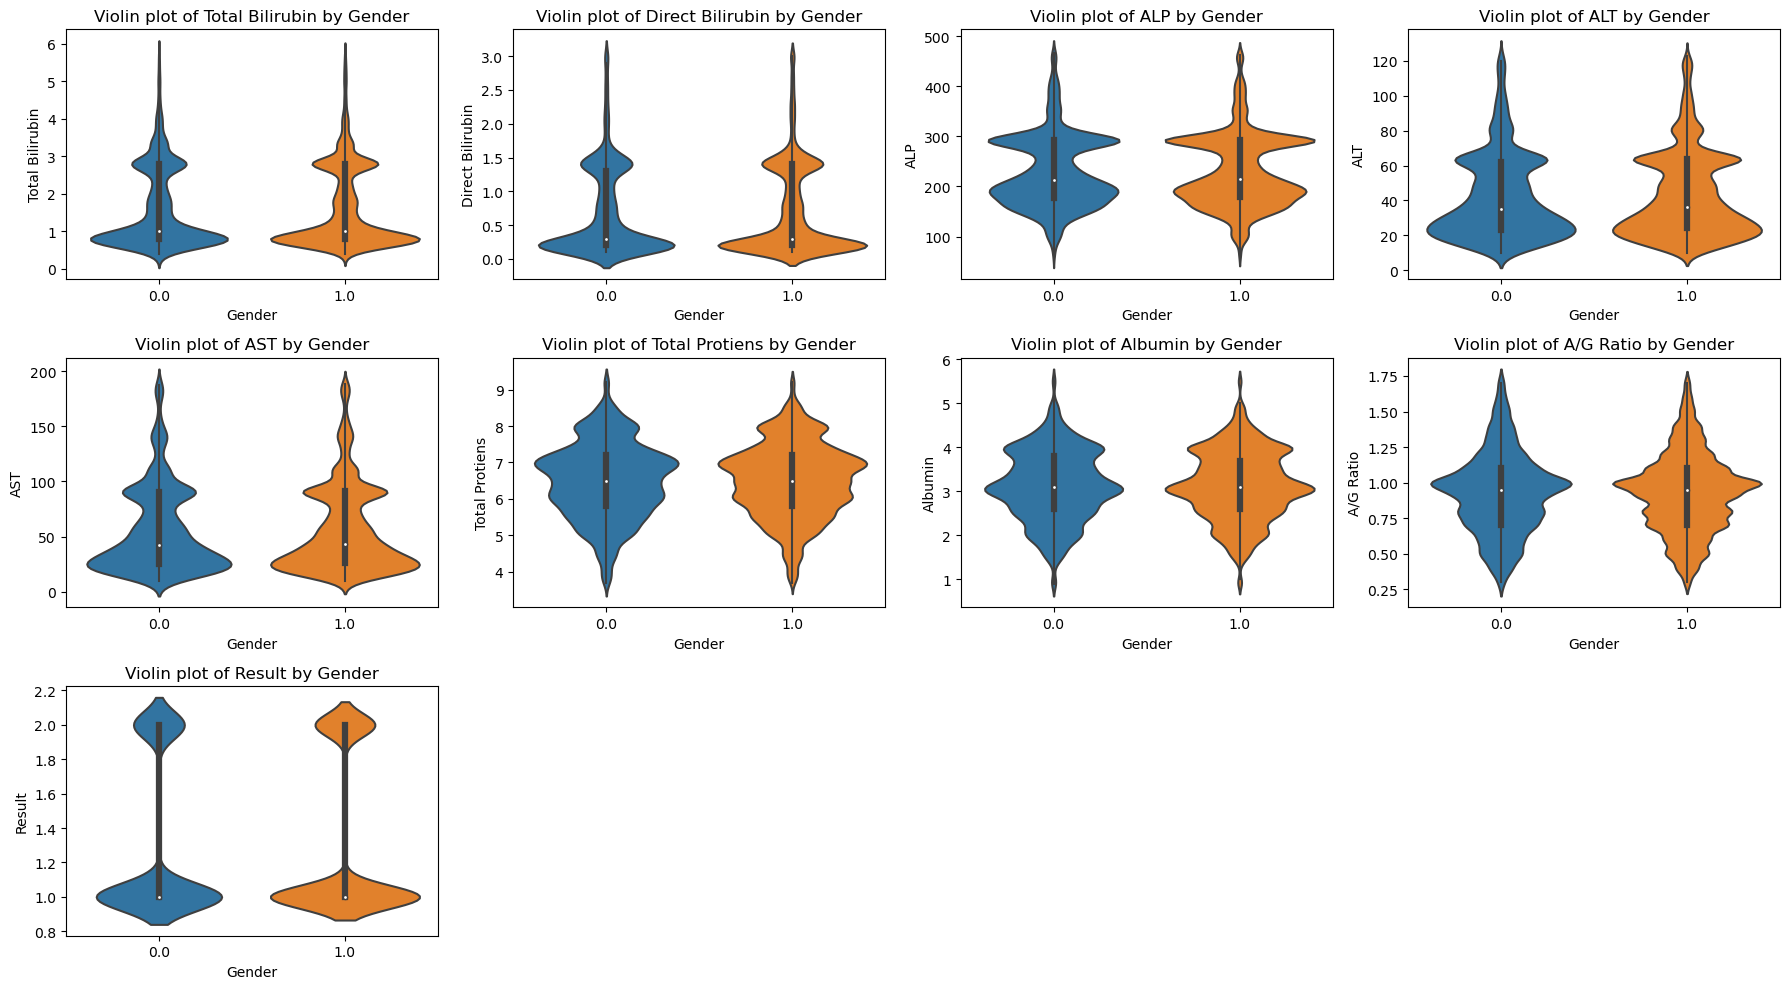

In [30]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(data.columns[2:12]):  # Exclude 'gender' column
    plt.subplot(3, 4, i+1)  # Adjust subplot layout as per your preference
    sns.violinplot(x="Gender", y=feature, data=data)
    plt.title("Violin plot of {} by Gender".format(feature))

plt.tight_layout()
plt.show()

# Splitting the data into test and train

In [31]:
X = data.drop(columns = 'Result')
y = data['Result']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reverse the encoded labels
y_reversed = 1 - y_encoded

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_reversed, test_size=0.2, random_state=42)

# Feature Selection Techniques

In [68]:
# Ensure X is a pandas DataFrame
if isinstance(X, pd.DataFrame):
    feature_names = X.columns.tolist()
    X = X.values

# Ensure y is a pandas Series
if isinstance(y_reversed, pd.Series):
    y_reversed = y_reversed.values
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

## Boruta with XGB

In [69]:
# Boruta with XGB
xgb = XGBClassifier()
feat_selector = BorutaPy(xgb, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(X, y_reversed)
selected_mask = feat_selector.support_

selected_features = [feature_names[i] for i in range(len(selected_mask)) if selected_mask[i]]

print("\nSelected features:")
print(selected_features)

X_filtered = feat_selector.transform(X)
X_filtered_df = pd.DataFrame(X_filtered, columns=selected_features)
X = X_filtered_df

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	2

Selected features:
['Total Bilirubin', 'Direct Bilirubin', 'ALP', 'ALT', 'AST', 'Total Protiens', 'Albumin', 'A/G Ratio']


## Boruta with RF

In [194]:
#Boruta with RF

rf = RandomForestClassifier()
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(X, y_reversed)
selected_mask = feat_selector.support_

selected_features = [feature_names[i] for i in range(len(selected_mask)) if selected_mask[i]]
print("\nSelected features:")
print(selected_features)

X_filtered = feat_selector.transform(X)
X_filtered_df = pd.DataFrame(X_filtered, columns=selected_features)
X = X_filtered_df

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	2

Selected features:
['Total Bilirubin', 'Direct Bilirubin', 'ALP', 'ALT', 'AST', 'Total Protiens', 'Albumin', 'A/G Ratio']


## Boruta with ET 

In [197]:
#Boruta with ET

et = ExtraTreesClassifier(n_estimators=100, random_state=42)
feat_selector = BorutaPy(et, n_estimators='auto', verbose=2, random_state=1)

feat_selector.fit(X, y_reversed)
selected_mask = feat_selector.support_

selected_features = [feature_names[i] for i in range(len(selected_mask)) if selected_mask[i]]
print("\nSelected features:")
print(selected_features)

X_filtered = feat_selector.transform(X)
X_filtered_df = pd.DataFrame(X_filtered, columns=selected_features)
X = X_filtered_df

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	2

Selected features:
['Total Bilirubin', 'Direct Bilirubin', 'ALP', 'ALT', 'AST', 'Total Protiens', 'Albumin', 'A/G Ratio']


## Mutual Information

In [200]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(X, y_reversed)
feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])

sorted_importances = feat_importances.sort_values(ascending=False)
top_features = sorted_importances.head(70)

print("Top features:")
print(top_features)
print(type(X))

Top features:
ALP                 0.230867
AST                 0.165338
ALT                 0.134438
Total Bilirubin     0.094857
A/G Ratio           0.091662
Direct Bilirubin    0.083855
Albumin             0.050903
Total Protiens      0.042022
Gender              0.002454
Age                 0.000000
dtype: float64
<class 'numpy.ndarray'>


In [190]:
top_features_series = pd.Series(top_features)

threshold = top_features_series.quantile(0.4)
selected_features = top_features_series[top_features_series >= threshold].index.tolist()

print("Selected Features: ",selected_features)
X = X[selected_features]

Selected Features:  ['ALP', 'AST', 'ALT', 'Total Bilirubin', 'A/G Ratio', 'Direct Bilirubin']


# Applying Data Balancing Techniques to oversample the minority class

## SMOTE

In [32]:
#before balanced y_train
bb_y_train = y_train

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#after balanced y_train
ab_y_train = y_train

## ADASYN

In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN

#before balanced y_train
bb_y_train = y_train

# Apply ADASYN to oversample the minority class
adasyn = ADASYN(sampling_strategy='minority')
X_train, y_train = adasyn.fit_resample(X_train, y_train)

#after balanced y_train
ab_y_train = y_train

## BorderlineSMOTE

In [ ]:
#BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

#before balanced y_train
bb_y_train = y_train

# Apply Borderline-SMOTE to oversample the minority class
borderline_smote = BorderlineSMOTE()
X_train, y_train = borderline_smote.fit_resample(X_train, y_train)

#after balanced y_train
ab_y_train = y_train

# Before balanced dataset train distribution

1    11056
0     4438
dtype: int64


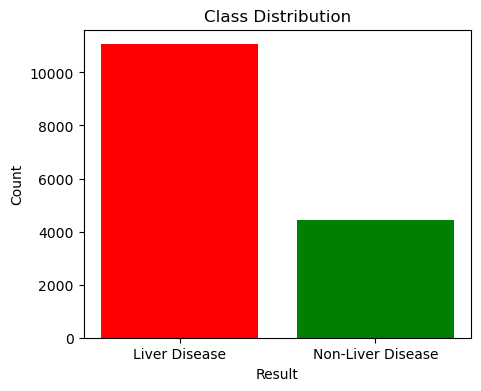

In [33]:
bb_y_train = pd.Series(bb_y_train)
class_counts = bb_y_train.value_counts()
print(class_counts)

plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['Liver Disease', 'Non-Liver Disease'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# After balanced dataset train distribution

0    11056
1    11056
dtype: int64


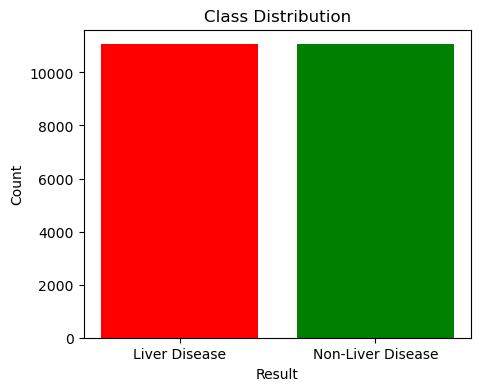

In [34]:
ab_y_train = pd.Series(ab_y_train)
class_counts = ab_y_train.value_counts()
print(class_counts)

plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['Liver Disease', 'Non-Liver Disease'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [35]:
X.shape

(19368, 10)

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_pred = mlp.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9721218378936499


# Decision Tree Classifier with K-Fold

In [36]:
X = pd.DataFrame(X)

In [37]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X_scaled and y are already defined and preprocessed
y = np.array(y)
k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=64)

results = []

# K-Fold Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_reversed[train_index], y_reversed[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred_dt = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_dt)
    print(f'Accuracy: {accuracy}')
    results.append(accuracy)

# Calculate and print the average accuracy
average_accuracy_dt = np.mean(results)
print(f'Average Accuracy: {average_accuracy_dt}')

Accuracy: 0.9876097057305111
Accuracy: 0.982447083118224
Accuracy: 0.9834796076406814
Accuracy: 0.9855446566855963
Accuracy: 0.9891584925141972
Accuracy: 0.982447083118224
Accuracy: 0.9886422302529685
Accuracy: 0.9834796076406814
Accuracy: 0.9798553719008265
Accuracy: 0.9850206611570248
Average Accuracy: 0.9847684499758935



               precision    recall  f1-score   support

           0       0.97      0.97      0.97       556
           1       0.99      0.99      0.99      1380

    accuracy                           0.99      1936
   macro avg       0.98      0.98      0.98      1936
weighted avg       0.99      0.99      0.99      1936

[[ 541   15]
 [  14 1366]]


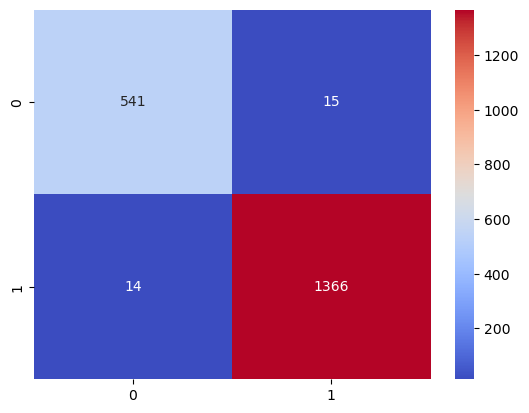

Decision Tree AUC: 0.98


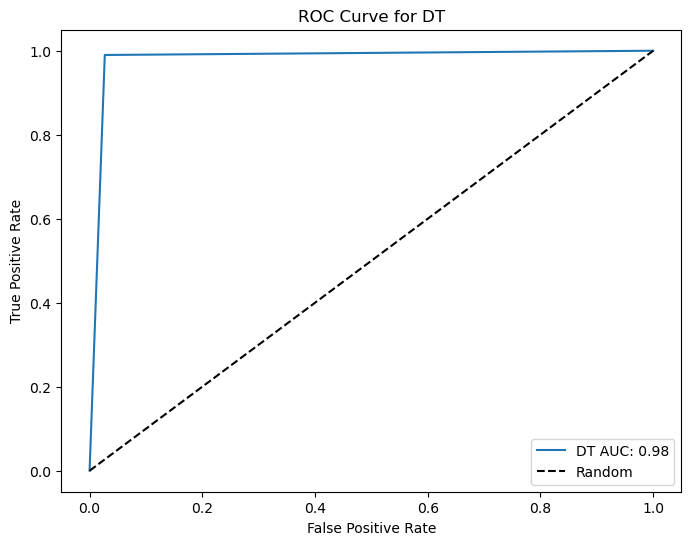

In [38]:
dt_f1 = f1_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_sensitivity = recall_score(y_test, y_pred_dt)
dt_specificity = recall_score(y_test, y_pred_dt, pos_label = 1.0)

dt_report = classification_report(y_test, y_pred_dt)
print("\n",dt_report)

cm_dt=confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
sns.heatmap(cm_dt, annot=True, cmap='coolwarm', fmt = 'g')
plt.show()

fpr_dt,tpr_dt,threshold_dt = roc_curve(y_test,y_pred_dt,pos_label=1)
auc_score_dt = roc_auc_score(y_test,y_pred_dt)
print(f'Decision Tree AUC: {auc_score_dt:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT AUC: {auc_score_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for DT')
plt.legend()
plt.show()

# NaiveBayes Hyperparameter Tuning (RandomSearchCV)

In [39]:
param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

nb_classifier = GaussianNB()
random_search = RandomizedSearchCV(
    nb_classifier, 
    param_distributions=param_dist, 
    n_iter=100,
    scoring='accuracy', 
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params_nb = random_search.best_params_
print("Best Parameters:", best_params_nb)

Best Parameters: {'var_smoothing': 0.2848035868435802}


# NaiveBayes Classifier with K-Fold

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

y = np.array(y)
k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=64)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_reversed[train_index], y_reversed[test_index]

    classifier = GaussianNB(**best_params_nb)
    classifier.fit(X_train, y_train)
    y_pred_nb = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_nb)
    print(f'Accuracy: {accuracy}')
    results.append(accuracy)

average_accuracy_nb = np.mean(results)
print(f'Average Accuracy: {average_accuracy_nb}')

Accuracy: 0.7181208053691275
Accuracy: 0.7279297883324729
Accuracy: 0.7041817243159525
Accuracy: 0.7181208053691275
Accuracy: 0.7139907072792979
Accuracy: 0.7325761486835313
Accuracy: 0.706763035622096
Accuracy: 0.710376871450697
Accuracy: 0.7133264462809917
Accuracy: 0.7112603305785123
Average Accuracy: 0.7156646663281807



               precision    recall  f1-score   support

           0       0.49      0.12      0.19       556
           1       0.73      0.95      0.82      1380

    accuracy                           0.71      1936
   macro avg       0.61      0.53      0.51      1936
weighted avg       0.66      0.71      0.64      1936

[[  67  489]
 [  70 1310]]


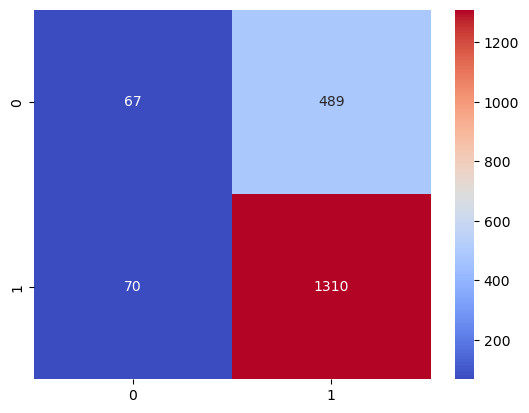

Naive Bayes AUC: 0.53


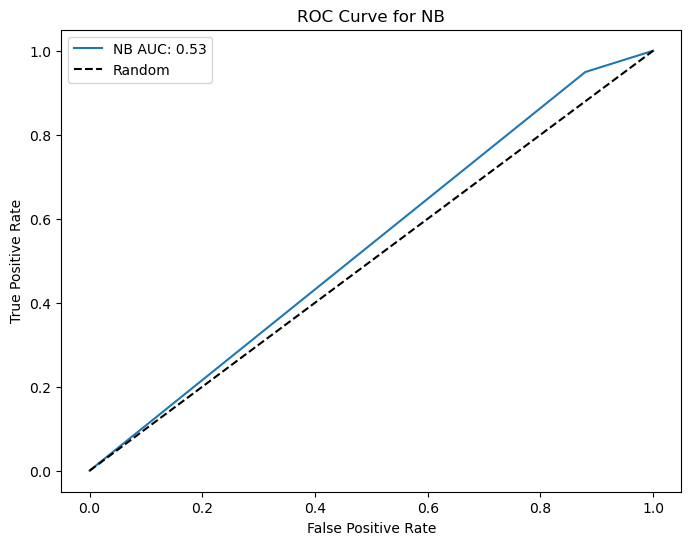

In [41]:
nb_f1 = f1_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_sensitivity = recall_score(y_test, y_pred_nb)
nb_specificity = recall_score(y_test, y_pred_nb, pos_label = 1.0)

nb_report = classification_report(y_test, y_pred_nb)
print("\n",nb_report)

cm_nb=confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
sns.heatmap(cm_nb, annot=True, cmap='coolwarm', fmt = 'd')
plt.show()

fpr_nb,tpr_nb,threshold_nb = roc_curve(y_test,y_pred_nb,pos_label=1)
auc_score_nb = roc_auc_score(y_test,y_pred_nb)
print(f'Naive Bayes AUC: {auc_score_nb:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB AUC: {auc_score_nb:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for NB')
plt.legend()
plt.show()

# Random Forest Classifier with K-Fold

In [42]:
y = np.array(y)
k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=64)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_reversed[train_index], y_reversed[test_index]

    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred_rf = rf_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_rf)
    print(f'Accuracy: {accuracy}')
    results.append(accuracy)

average_accuracy_rf = np.mean(results)
print(f'Average Accuracy: {average_accuracy_rf}')

Accuracy: 0.9958699019101703
Accuracy: 0.9927723283427982
Accuracy: 0.9932885906040269
Accuracy: 0.9958699019101703
Accuracy: 0.9953536396489416
Accuracy: 0.9958699019101703
Accuracy: 0.9927723283427982
Accuracy: 0.9958699019101703
Accuracy: 0.9917355371900827
Accuracy: 0.993801652892562
Average Accuracy: 0.994320368466189



               precision    recall  f1-score   support

           0       1.00      0.98      0.99       556
           1       0.99      1.00      1.00      1380

    accuracy                           0.99      1936
   macro avg       1.00      0.99      0.99      1936
weighted avg       0.99      0.99      0.99      1936

[[ 545   11]
 [   1 1379]]


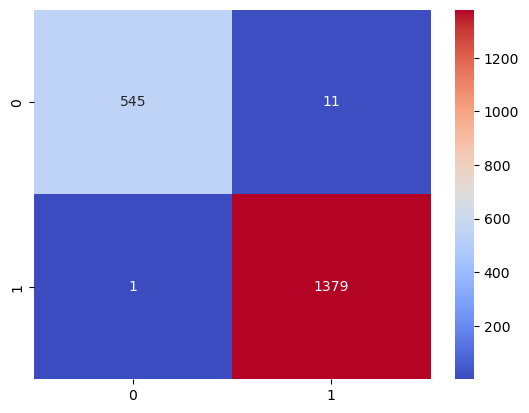

Random Forest AUC: 0.99


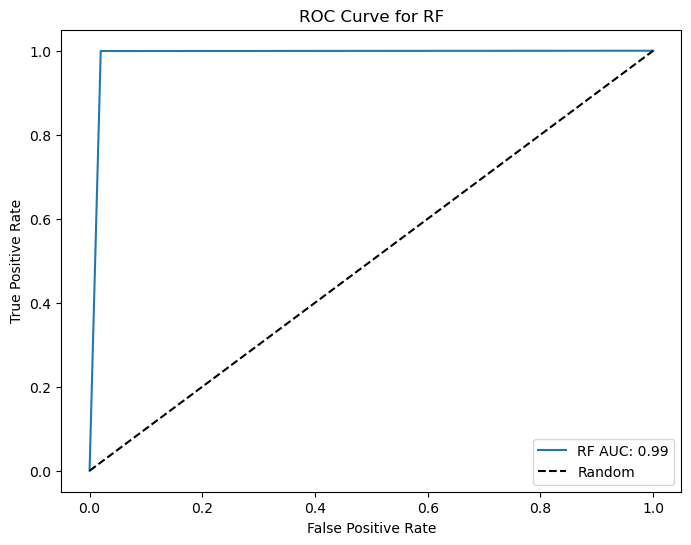

In [43]:
rf_f1 = f1_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_sensitivity = recall_score(y_test, y_pred_rf)
rf_specificity = recall_score(y_test, y_pred_rf, pos_label = 1.0)

rf_report = classification_report(y_test, y_pred_rf)
print("\n",rf_report)

cm_rf=confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
sns.heatmap(cm_rf, annot=True, cmap='coolwarm', fmt = 'd')
plt.show()

fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test,y_pred_rf,pos_label=1)
auc_score_rf = roc_auc_score(y_test,y_pred_rf)
print(f'Random Forest AUC: {auc_score_rf:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF AUC: {auc_score_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF')
plt.legend()
plt.show()

# Extra Trees with K-Fold

In [44]:
y = np.array(y)
k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=64)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_reversed[train_index], y_reversed[test_index]

    et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
    et_classifier.fit(X_train, y_train)
    y_pred_et = et_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_et)
    print(f'Accuracy: {accuracy}')
    results.append(accuracy)

average_accuracy_et = np.mean(results)
print(f'Average Accuracy: {average_accuracy_et}')

Accuracy: 0.9932885906040269
Accuracy: 0.9901910170366546
Accuracy: 0.9922560660815695
Accuracy: 0.996386164171399
Accuracy: 0.9953536396489416
Accuracy: 0.9948373773877129
Accuracy: 0.9953536396489416
Accuracy: 0.9943211151264842
Accuracy: 0.9932851239669421
Accuracy: 0.9943181818181818
Average Accuracy: 0.9939590915490853



               precision    recall  f1-score   support

           0       1.00      0.98      0.99       556
           1       0.99      1.00      1.00      1380

    accuracy                           0.99      1936
   macro avg       0.99      0.99      0.99      1936
weighted avg       0.99      0.99      0.99      1936

[[ 547    9]
 [   2 1378]]


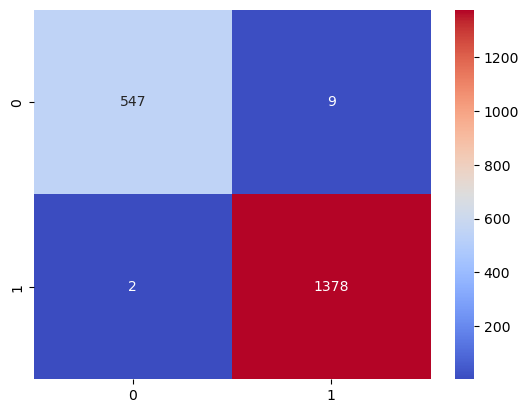

Extra Trees AUC: 0.99


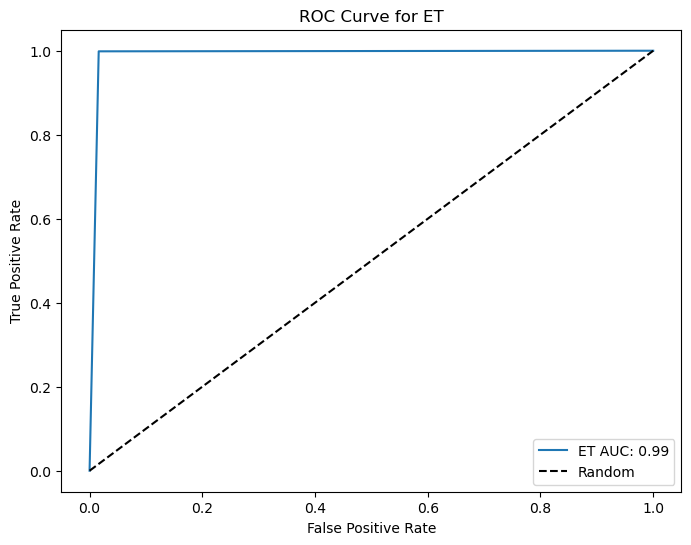

In [45]:
et_f1 = f1_score(y_test, y_pred_et)
et_precision = precision_score(y_test, y_pred_et)
et_sensitivity = recall_score(y_test, y_pred_et)
et_specificity = recall_score(y_test, y_pred_et, pos_label = 1.0)

et_report = classification_report(y_test, y_pred_et)
print("\n",et_report)

cm_et=confusion_matrix(y_test, y_pred_et)
print(cm_et)
sns.heatmap(cm_et, annot=True, cmap='coolwarm', fmt = 'd')
plt.show()

fpr_et,tpr_et,threshold_et = roc_curve(y_test,y_pred_et,pos_label=1)
auc_score_et = roc_auc_score(y_test,y_pred_et)
print(f'Extra Trees AUC: {auc_score_et:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr_et, tpr_et, label=f'ET AUC: {auc_score_et:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ET')
plt.legend()
plt.show()

# XGBoost Hyperparameter Tuning (RandomSearchCV)

In [46]:
xgb_model = XGBClassifier()

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0.5, 1.5)
}

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=3, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

best_params_xgb = random_search.best_params_

print(f"Best parameters: {best_params_xgb}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'colsample_bytree': 0.7144176772591101, 'gamma': 0.2847437194774158, 'learning_rate': 0.18733607745960953, 'max_depth': 6, 'n_estimators': 187, 'reg_alpha': 0.3129299578571182, 'reg_lambda': 1.2547043878701316, 'subsample': 0.9569469523564966}


# XGBoost Classifier with K-Fold

In [47]:
y = np.array(y)
k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=64)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_reversed[train_index], y_reversed[test_index]

    xgboost_model = XGBClassifier(**best_params_xgb)

    xgboost_model.fit(X_train, y_train)
    y_pred_xgb = xgboost_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_xgb)
    print(f'Accuracy: {accuracy}')
    results.append(accuracy)

average_accuracy_xgb = np.mean(results)
print(f'Average Accuracy: {average_accuracy_xgb}')

Accuracy: 0.9979349509550852
Accuracy: 0.9953536396489416
Accuracy: 0.996386164171399
Accuracy: 0.9969024264326277
Accuracy: 0.9969024264326277
Accuracy: 0.996386164171399
Accuracy: 0.996386164171399
Accuracy: 0.9974186886938565
Accuracy: 0.9974173553719008
Accuracy: 0.9958677685950413
Average Accuracy: 0.9966955748644277



               precision    recall  f1-score   support

           0       0.99      0.99      0.99       556
           1       1.00      1.00      1.00      1380

    accuracy                           1.00      1936
   macro avg       1.00      0.99      0.99      1936
weighted avg       1.00      1.00      1.00      1936

[[ 551    5]
 [   3 1377]]


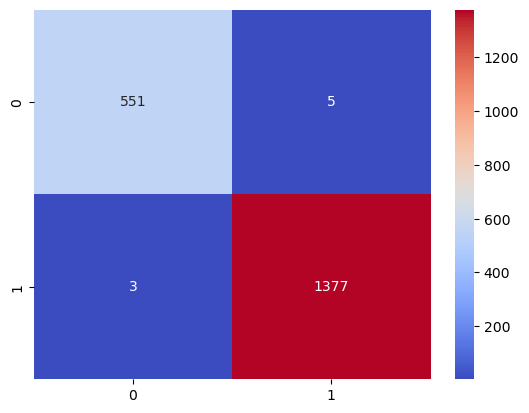

XGBoost AUC: 0.99


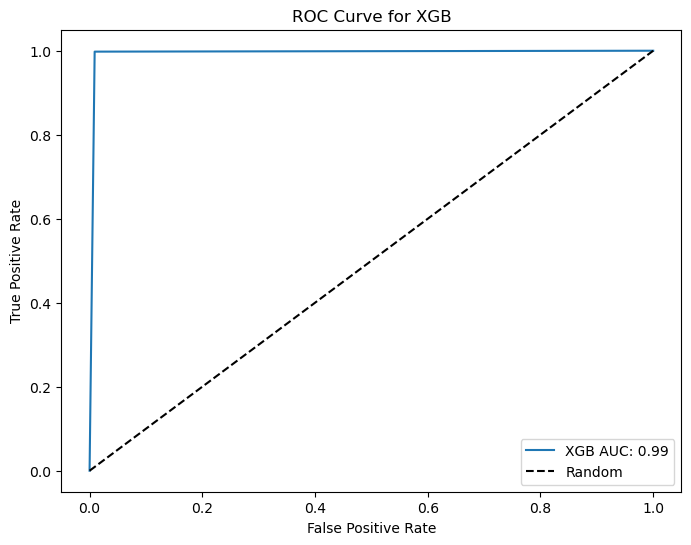

In [48]:
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_sensitivity = recall_score(y_test, y_pred_xgb)
xgb_specificity = recall_score(y_test, y_pred_xgb, pos_label = 1.0)

xgb_report = classification_report(y_test, y_pred_xgb)
print("\n",xgb_report)

cm_xgb=confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)
sns.heatmap(cm_xgb, annot=True, cmap='coolwarm', fmt = 'd')
plt.show()

fpr_xgb,tpr_xgb,threshold_xgb = roc_curve(y_test,y_pred_xgb,pos_label=1)
auc_score_xgb = roc_auc_score(y_test,y_pred_xgb)
print(f'XGBoost AUC: {auc_score_xgb:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB AUC: {auc_score_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB')
plt.legend()
plt.show()

# CatBoost Classifier with K-Fold

In [49]:
y = np.array(y)
k_folds = 10

kf = KFold(n_splits=k_folds, shuffle=True, random_state=64)

results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_reversed[train_index], y_reversed[test_index]

    catboost_classifier = CatBoostClassifier()
    catboost_classifier.fit(X_train, y_train, verbose=False)
    y_pred_cb = catboost_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_cb)
    print(f'Accuracy: {accuracy}')
    results.append(accuracy)

average_accuracy_cb = np.mean(results)
print(f'Average Accuracy: {average_accuracy_cb}')

Accuracy: 0.9958699019101703
Accuracy: 0.9907072792978833
Accuracy: 0.9917398038203408
Accuracy: 0.9953536396489416
Accuracy: 0.996386164171399
Accuracy: 0.9948373773877129
Accuracy: 0.9969024264326277
Accuracy: 0.9974186886938565
Accuracy: 0.9943181818181818
Accuracy: 0.996900826446281
Average Accuracy: 0.9950434289627393



               precision    recall  f1-score   support

           0       1.00      0.99      0.99       556
           1       1.00      1.00      1.00      1380

    accuracy                           1.00      1936
   macro avg       1.00      1.00      1.00      1936
weighted avg       1.00      1.00      1.00      1936

[[ 551    5]
 [   1 1379]]


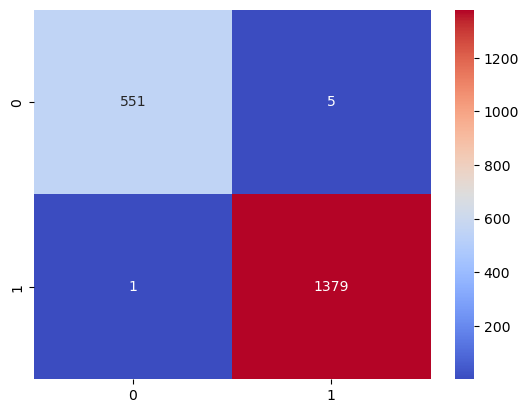

CatBoost AUC: 1.00


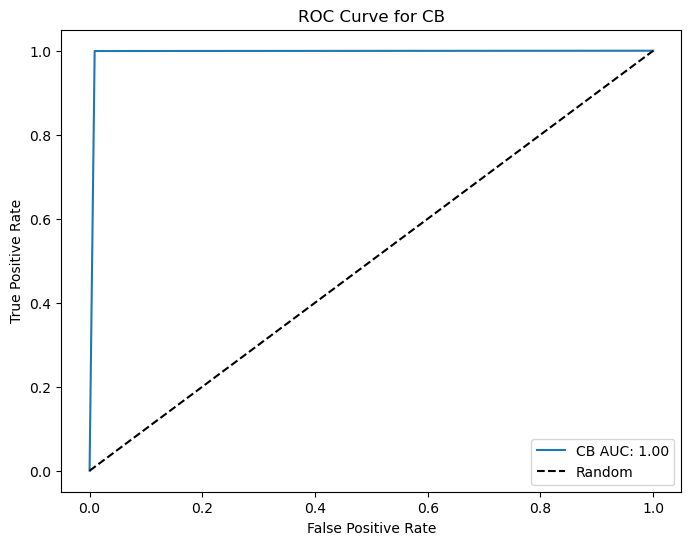

In [50]:
cb_f1 = f1_score(y_test, y_pred_cb)
cb_precision = precision_score(y_test, y_pred_cb)
cb_sensitivity = recall_score(y_test, y_pred_cb)
cb_specificity = recall_score(y_test, y_pred_cb, pos_label = 1.0)

cb_report = classification_report(y_test, y_pred_cb)
print("\n",cb_report)

cm_cb=confusion_matrix(y_test, y_pred_cb)
print(cm_cb)
sns.heatmap(cm_cb, annot=True, cmap='coolwarm', fmt = 'd')
plt.show()

fpr_cb,tpr_cb,threshold_cb = roc_curve(y_test,y_pred_cb,pos_label=1)
auc_score_cb = roc_auc_score(y_test,y_pred_cb)
print(f'CatBoost AUC: {auc_score_cb:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr_cb, tpr_cb, label=f'CB AUC: {auc_score_cb:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CB')
plt.legend()
plt.show()

In [51]:
from tabulate import tabulate

columns = ["Classifier", "Accuracy", "Sensitivity", "Specificity", "F-Measure", "Precision"]

naive_bayes = ["Naive Bayes", average_accuracy_nb, nb_sensitivity, nb_specificity, nb_f1, nb_precision]
decision_tree = ["Decision Tree", average_accuracy_dt, dt_sensitivity, dt_specificity, dt_f1, dt_precision]
random_forest = ["Random Forest", average_accuracy_rf, rf_sensitivity, rf_specificity, rf_f1, rf_precision]
extra_trees = ["Extra Trees", average_accuracy_et, et_sensitivity, et_specificity, et_f1, et_precision]
xgboost = ["XGBoost", average_accuracy_xgb, xgb_sensitivity, xgb_specificity, xgb_f1, xgb_precision]
cat_boost = ["CatBoost", average_accuracy_cb, cb_sensitivity, cb_specificity, cb_f1, cb_precision]

data_metrics = [naive_bayes, decision_tree, random_forest, extra_trees, xgboost, cat_boost]
print(tabulate(data_metrics, headers=columns))

Classifier       Accuracy    Sensitivity    Specificity    F-Measure    Precision
-------------  ----------  -------------  -------------  -----------  -----------
Naive Bayes      0.715665       0.949275       0.949275     0.824159     0.728182
Decision Tree    0.984768       0.989855       0.989855     0.989497     0.989138
Random Forest    0.99432        0.999275       0.999275     0.995668     0.992086
Extra Trees      0.993959       0.998551       0.998551     0.996025     0.993511
XGBoost          0.996696       0.997826       0.997826     0.997104     0.996382
CatBoost         0.995043       0.999275       0.999275     0.997829     0.996387
